In [1]:
from data_handlers import StockHistDataHandler,ComputeSuite
from scipy.stats import skew,kurtosis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import xarray as xr
data_handler = StockHistDataHandler()
from utilities.function_utilities import *
from strategy_base import *
from portfolio_base import *

In [26]:
tickers = data_handler(sql = "select ticker from securities ").values.ravel()
ts_range = ["2010-11-15","2021-01-5"]
selected_tickers = tickers
all_data = data_handler.get_data(ticker = selected_tickers, invest_horizen = ts_range)
_ = ComputeSuite.pct_return(all_data.loc[:,:,:])

In [79]:
in_sample_data = all_data.loc[:,:,"2017-1-15":"2019-06-5"]
in_sample_data = in_sample_data.loc[:,["adj_close_price","return"],:]
in_sample_data = dropna_ext(in_sample_data)

Raw data dim: (503, 2, 600)
New data dim: (489, 2, 600)
Dropped tickers: ['AMCR' 'BKR' 'CARR' 'CTVA' 'DOW' 'DXC' 'EVRG' 'FOX' 'FOXA' 'IR' 'LIN'
 'OTIS' 'VNT' 'VTRS']


In [80]:
init_holdings = pd.DataFrame(np.zeros(len(in_sample_data.ticker)));init_holdings.index = in_sample_data.ticker; init_holdings.columns = ["share"]


portfolio_1 = portfolio(init_holdings= init_holdings, init_cash = 1e6, strategy= buy_low_strategy_trade_1(),alloc="equal_dollar")
portfolio_2 = portfolio(init_holdings= init_holdings, init_cash = 1e6, strategy= buy_low_strategy_trade_2(),alloc="equal_dollar")
portfolio_3 = portfolio(init_holdings= init_holdings, init_cash = 1e6, strategy= buy_low_strategy_trade_3(),alloc="equal_dollar")
portfolio_4 = portfolio(init_holdings= init_holdings, init_cash = 1e6, strategy= buy_low_strategy_trade_random(),alloc="equal_dollar")


rolling_apply_ext_xarray(2, in_sample_data, portfolio_1.update)
rolling_apply_ext_xarray(2, in_sample_data, portfolio_2.update)
rolling_apply_ext_xarray(3, in_sample_data, portfolio_3.update)
rolling_apply_ext_xarray(2, in_sample_data, portfolio_4.update)

init
init
init
init
init


0

In [81]:
market = 1e6/xarray2df(in_sample_data,"adj_close_price").mean(axis=0)[0]* xarray2df(in_sample_data,"adj_close_price").mean(axis=0)


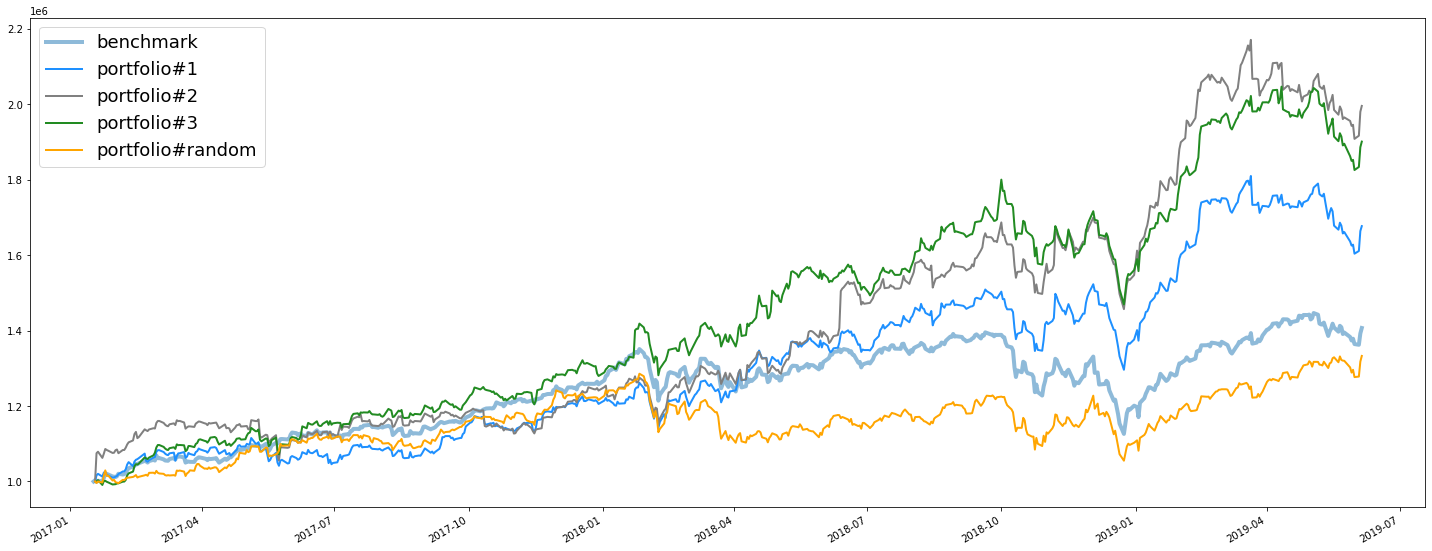

In [82]:
fig,ax = plt.subplots(figsize=(25,10))
market.plot(label="benchmark",lw=4,alpha=0.5)
portfolio_1.total_asset_hist.plot(ax=ax,c="dodgerblue",label = "portfolio#1",lw=2)
portfolio_2.total_asset_hist.plot(ax=ax,c="gray",label = "portfolio#2",lw=2)
portfolio_3.total_asset_hist.plot(ax=ax,c="forestgreen",label = "portfolio#3",lw=2)
portfolio_4.total_asset_hist.plot(ax=ax,c="orange",label = "portfolio#random",lw=2)
# portfolio_1.strategy_hit_point.plot(ax=ax.twinx(),color="gray",alpha=0.2)
ax.legend(fontsize=18)
